# Hands-on Quiz - MedicaInsure Insurance

### Problem Statement

MedicaInsure is a medical insurance provider. Leveraging customer information is of paramount importance for most businesses. In the case of an insurance company, analysis of customer attributes like age, sex, smoking habits, etc. can be crucial in making decisions regarding the premium amount to be charged.

### Data Information
Attribute information:

- age: age of the policyholder
- sex: gender of the policyholder
- bmi: Body Mass Index of the policyholder
- children: number of children of the policyholder
- smoker: whether the policyholder is a smoker or not
- region: region where the policyholder belongs to
- charges: premium charged to the policyholder


### Import Necessary Libraries

In [39]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

# Libraries to help with Regression model
from sklearn.linear_model import LinearRegression  # to build linear regression_model
from sklearn.model_selection import (
    train_test_split,
)  # Sklearn package's randomized data splitting function
from sklearn.metrics import mean_squared_error  # to check model performance
from sklearn.metrics import mean_absolute_error  # to check model performance

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

### Load the dataset

In [2]:
df = pd.read_csv("./datasets/insurance.csv")

**1. Load the dataset. What is the shape of the data and how many values are missing in the charges column?**  
(1338,7) ; 0

In [4]:
print(f'No of rows is {df.shape[0]} and columns is {df.shape[1]}')

No of rows is 1338 and columns is 7


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**2. What does the distribution of charges look like?** 

Right-skewed

<AxesSubplot:xlabel='charges', ylabel='Count'>

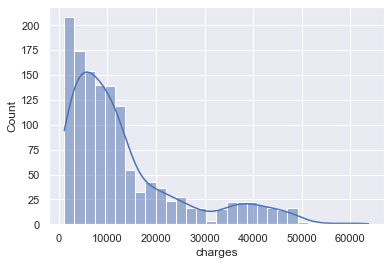

In [14]:
sns.histplot(data=df, x='charges', kde=True)

**3. What percentage of policy holders have no children?**

~43%

In [9]:
(df.children.value_counts()/df.children.value_counts().sum())*100

0    42.899851
1    24.215247
2    17.937220
3    11.733931
4     1.868460
5     1.345291
Name: children, dtype: float64

In [10]:
df.children.value_counts(normalize=True)*100

0    42.899851
1    24.215247
2    17.937220
3    11.733931
4     1.868460
5     1.345291
Name: children, dtype: float64

**4. What does the distribution of bmi look like after applying the log transformation on it?**

Note: Create a new transformed column, do not replace the existing column.

Text(0.5, 1.0, 'bmi distribution before transformation')

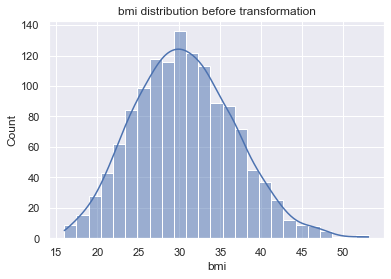

<IPython.core.display.Javascript object>

In [24]:
ax = sns.histplot(data=df, x="bmi", kde=True)
ax.set_title("bmi distribution before transformation")

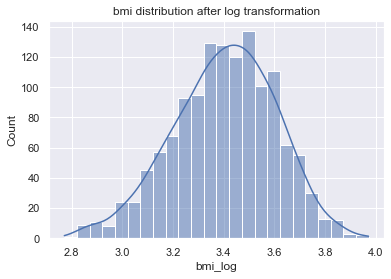

<IPython.core.display.Javascript object>

In [32]:
df["bmi_log"] = np.log(df["bmi"])

ax = sns.histplot(data=df, x="bmi_log", kde=True)
ax.set_title("bmi distribution after log transformation")

df.drop(["bmi_log"], axis=1, inplace=True)

**5. The customers from which region have the highest median insurance charge?**

North-East

In [27]:
df.groupby("region").charges.median().sort_values(ascending=False)

region
northeast    10057.652025
southeast     9294.131950
northwest     8965.795750
southwest     8798.593000
Name: charges, dtype: float64

<IPython.core.display.Javascript object>

**6. What is the correlation between age and charges?**

0.3

In [33]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<IPython.core.display.Javascript object>

<AxesSubplot:>

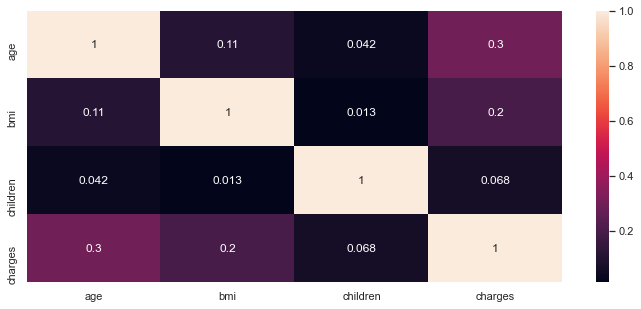

<IPython.core.display.Javascript object>

In [34]:
plt.figure(figsize=(12, 5))
sns.heatmap(df.corr(), annot=True)

**7. Create dummy variables for the categorical columns using pd.get_dummies() with drop_first=True. A dummy variable is dropped for which of the following regions?**

North-East

In [35]:
df = pd.get_dummies(df, columns=["sex", "smoker", "region"], drop_first=True)
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


<IPython.core.display.Javascript object>

**8. Split the data in 70:30 ratio to obtain the train and test sets, and build a linear regression model using sklearn LinearRegression and the train set. Which of the following is true for the coefficient of age?**

Note: Do not treat outliers in the data.


200 < coefficient of age < 300

In [36]:
x = df.drop(["charges"], axis=1)
y = df["charges"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)

output_array = np.append(linear_regression.coef_, linear_regression.intercept_)

coef_df = pd.DataFrame(
    output_array,
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
age,251.681865
bmi,322.389107
children,344.964255
sex_male,-282.796347
smoker_yes,24059.390477
region_northwest,-304.090098
region_southeast,-939.342097
region_southwest,-868.188559
Intercept,-11039.238419


<IPython.core.display.Javascript object>

**9. What percentage of variance in the train set is explained by the model?**

75-80%

In [37]:
r_squared = linear_regression.score(x_train, y_train)
r_squared

0.7545557492633161

<IPython.core.display.Javascript object>

**10. Which of the following is true for the MAE and RMSE on the test set?**

In [41]:
# y_pred is same as y_hat which are predicted y values
y_pred = linear_regression.predict(x_test)

np.sqrt(mean_squared_error(y_test, y_pred))

6063.122656850449

<IPython.core.display.Javascript object>

In [42]:
mean_absolute_error(y_test, y_pred)

4139.932064766011

<IPython.core.display.Javascript object>

Ans: `4000 < MAE < 4300, 5900 < RMSE < 6200`